In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Pravin\AppData\Local\Temp\ipykernel_13444\3999882305.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [58]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [59]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [60]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [61]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [62]:
store.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [63]:
store.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [64]:
store.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [65]:
# Handling the missing values
# CompetitionDistance has only 3 missing values, so we can replace them by median

In [66]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [67]:
# As no information is available about remaining missing values we can replace them by zeroes

In [68]:
store.fillna(0,inplace=True)

In [69]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [70]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [71]:
train.query('Sales==0')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [72]:
train_data = train.merge(store,on='Store',copy=False)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


<Axes: >

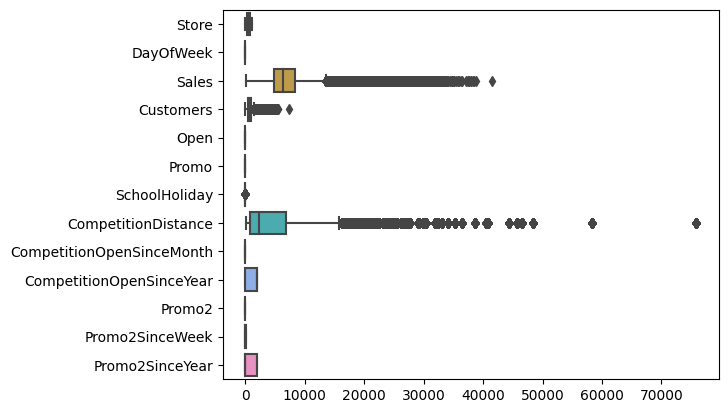

In [25]:
sns.boxplot(train_data,orient='h')

In [73]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['year'] = train_data['Date'].dt.year
train_data['month'] = train_data['Date'].dt.month
train_data['Week'] = train_data.Date.apply(lambda x: x.weekofyear)

In [74]:
train_data.head(-5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017199,1115,4,2013-01-10,5007,339,1,1,0,1,d,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2
1017200,1115,3,2013-01-09,4649,324,1,1,0,1,d,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2
1017201,1115,2,2013-01-08,5243,341,1,1,0,1,d,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2


In [75]:
train_data.drop(['Date'], axis = 1, inplace= True)

In [76]:
train_data['CompetitionOpenSince'] = np.where((train_data['CompetitionOpenSinceMonth']==0) & 
                                                  (train_data['CompetitionOpenSinceYear']==0) , 0,
                                                  (train_data.month - train_data.CompetitionOpenSinceMonth) 
                                                  + (12 * (train_data.year - train_data.CompetitionOpenSinceYear)) )

<Axes: xlabel='CompetitionOpenSince', ylabel='Count'>

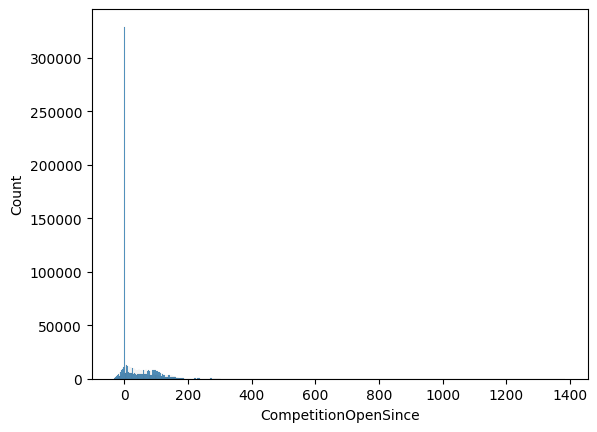

In [77]:
sns.histplot(train_data.CompetitionOpenSince)

In [78]:
train_data.drop(['CompetitionOpenSinceMonth'], axis = 1, inplace= True)
train_data.drop(['CompetitionOpenSinceYear'], axis = 1, inplace= True)

In [79]:
train_data['Promo2Since'] = np.where((train_data['Promo2SinceWeek']==0) & 
                                                  (train_data['Promo2SinceYear']==0) , 0,
                                                  (train_data.Week - train_data.Promo2SinceWeek)/4 
                                                  + (12 * (train_data.year - train_data.Promo2SinceYear)) )

In [80]:
train_data.drop(['Promo2SinceWeek'], axis = 1, inplace= True)
train_data.drop(['Promo2SinceYear'], axis = 1, inplace= True)

In [81]:
train_data = train_data.loc[:,['Store', 'DayOfWeek', 'Week', 'month', 'year', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSince', 'Promo2', 'Promo2Since', 'PromoInterval']]

In [82]:
train_data.head()

,Store,DayOfWeek,Week,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,31,7,2015,5263,555,1,1,0,1,c,a,1270.0,82.0,0,0.0,0
1,1,4,31,7,2015,5020,546,1,1,0,1,c,a,1270.0,82.0,0,0.0,0
2,1,3,31,7,2015,4782,523,1,1,0,1,c,a,1270.0,82.0,0,0.0,0
3,1,2,31,7,2015,5011,560,1,1,0,1,c,a,1270.0,82.0,0,0.0,0
4,1,1,31,7,2015,6102,612,1,1,0,1,c,a,1270.0,82.0,0,0.0,0


In [83]:
df=train_data.copy()

In [84]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [85]:
df['StateHoliday'] = np.where(df['StateHoliday']==0,'0',df['StateHoliday'])
df['PromoInterval'] = np.where(df['PromoInterval']==0,'0',df['PromoInterval'])

In [86]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [87]:
df.PromoInterval.unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [88]:
cat_cols=[col for col in df.columns if df[col].dtype == 'O']
cat_cols

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   DayOfWeek             1017209 non-null  int64  
 2   Week                  1017209 non-null  int64  
 3   month                 1017209 non-null  int64  
 4   year                  1017209 non-null  int64  
 5   Sales                 1017209 non-null  int64  
 6   Customers             1017209 non-null  int64  
 7   Open                  1017209 non-null  int64  
 8   Promo                 1017209 non-null  int64  
 9   StateHoliday          1017209 non-null  int32  
 10  SchoolHoliday         1017209 non-null  int64  
 11  StoreType             1017209 non-null  int32  
 12  Assortment            1017209 non-null  int32  
 13  CompetitionDistance   1017209 non-null  float64
 14  CompetitionOpenSince  1017209 non-

In [102]:
df.head(-5)

,Store,DayOfWeek,Week,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,31,7,2015,5263,555,1,1,0,1,2,0,1270.0,82.0,0,0.00,0
1,1,4,31,7,2015,5020,546,1,1,0,1,2,0,1270.0,82.0,0,0.00,0
2,1,3,31,7,2015,4782,523,1,1,0,1,2,0,1270.0,82.0,0,0.00,0
3,1,2,31,7,2015,5011,560,1,1,0,1,2,0,1270.0,82.0,0,0.00,0
4,1,1,31,7,2015,6102,612,1,1,0,1,2,0,1270.0,82.0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017199,1115,4,2,1,2013,5007,339,1,1,0,1,3,2,5350.0,0.0,1,7.00,3
1017200,1115,3,2,1,2013,4649,324,1,1,0,1,3,2,5350.0,0.0,1,7.00,3
1017201,1115,2,2,1,2013,5243,341,1,1,0,1,3,2,5350.0,0.0,1,7.00,3
1017202,1115,1,2,1,2013,6905,471,1,1,0,1,3,2,5350.0,0.0,1,7.00,3


<Axes: >

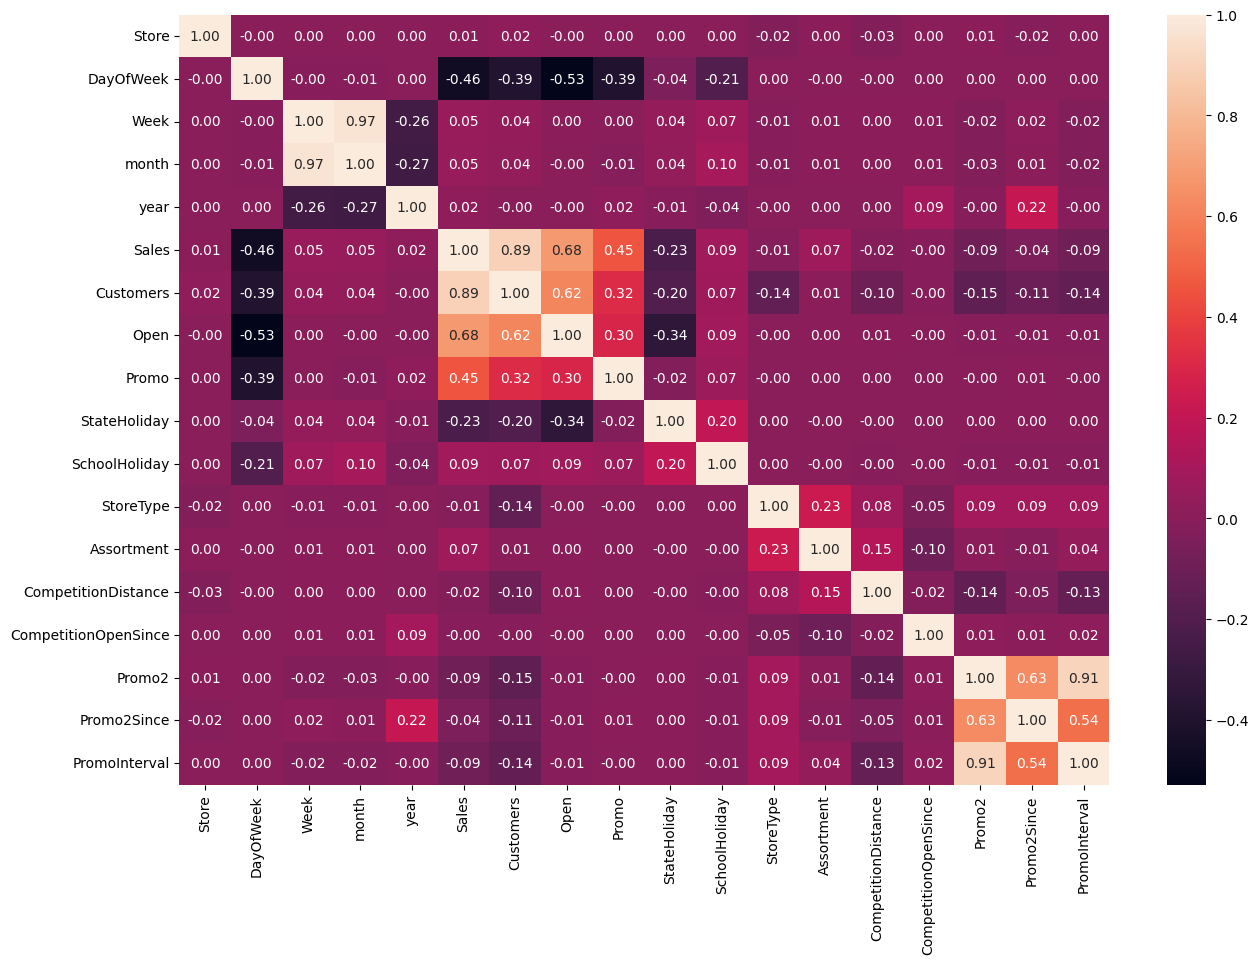

In [92]:
plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

In [93]:
X=df.drop(['Sales','Customers'],axis=1)
y=df.Sales
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [94]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [95]:
X_train = scaled.fit_transform(X_train)

In [96]:
X_test = scaled.transform(X_test)

In [97]:
reg.fit(X_train,y_train)

LinearRegression()

In [98]:
y_pred=reg.predict(X_test)

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5527902080425207

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
rfr=RandomForestRegressor()

In [105]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
y_rfr=rfr.predict(X_test)

0.5527902080425207

In [107]:
r2_score(y_test,y_rfr)

0.9425349032012234